In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from plotnine import *

nyc_crash_2021 = pd.read_csv('nyc_mv_crash_2021.csv')

## Create additional variables we're interested in visualizing.
nyc_crash_2021['CRASH DATE'] = pd.to_datetime(nyc_crash_2021['CRASH DATE'])

## Create vaviable 'Month'
nyc_crash_2021['Month'] = nyc_crash_2021['CRASH DATE'].dt.strftime('%b')

def season(x):
    if x in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif x in ['Mar', 'Apr', 'May']:
        return 'Spring'
    elif x in ['Jun', 'Jul', 'Aug']:
        return 'Summer'
    else:
        return 'Fall'

## Create variables 'Season' and 'Hour'
nyc_crash_2021['Season'] = nyc_crash_2021['Month'].apply(season)
nyc_crash_2021['Hour'] = [int(x.split(':')[0]) for x in nyc_crash_2021['CRASH TIME']]

When it comes to motor vehicle crashes in New York, one question that comes to mind is: 

"How many crashes in the dataset take place during different times of the year, particularly in different seasons?"

To answer this, we can create a simple countplot showing the frequency of crashes that take place in different seasons.

Text(0.5, 1.0, 'NYC Motor Vehicle Crashes for Each Season')

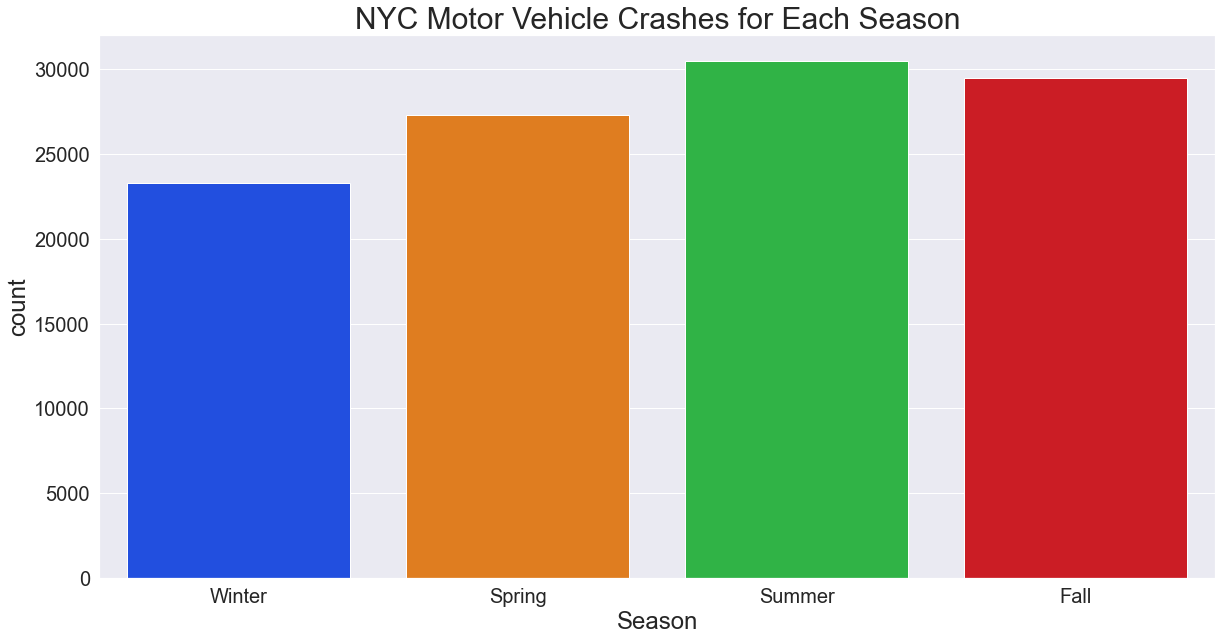

In [2]:
plt.figure(figsize = (20, 10))
sns.set_theme(style = 'darkgrid', palette = 'bright', rc = 
              {"axes.labelsize": 24, 'xtick.labelsize': 20, 'ytick.labelsize': 20})

sns.countplot(x = 'Season', data = nyc_crash_2021)
plt.title('NYC Motor Vehicle Crashes for Each Season', fontsize = 30)

Here we observe that the most crashes take place during the summer months, and the least crashes occur during the winter
months. Overall, there doesn't appear to be a massive difference in the number of crashes for any of the seasons.

Now let's create a similar plot, but split the number of crashes in each season by the borough in which the crash took place.

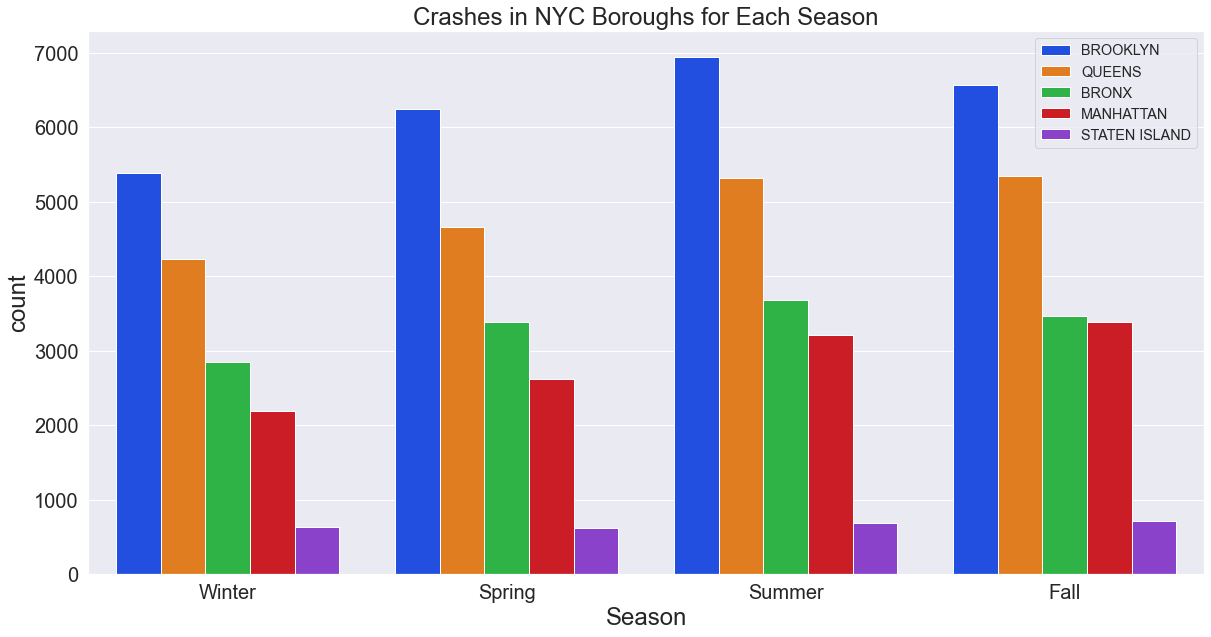

In [3]:
plt.figure(figsize = (20, 10))

sns.countplot(x = 'Season', data = nyc_crash_2021, hue = 'BOROUGH')
plt.title('Crashes in NYC Boroughs for Each Season', fontsize = 24)
plt.legend(fontsize = 'large')

We can see that regardless of season, Brooklyn has the most vehicle crashes, while Staten Island has by far the least. 
We can also see that the number of crashes in general increases from spring to summer, and then begins to decrease as we 
transition to the colder fall and winter months.